In [2]:
import matplotlib.pyplot as plt
from collections import Counter 
import pandas as pd
import numpy as np

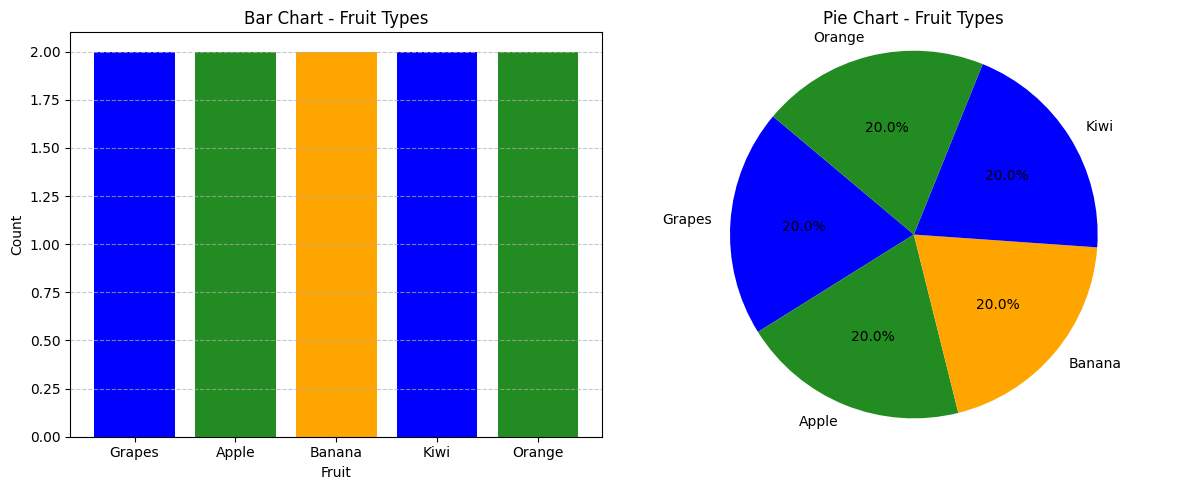

In [3]:
fruits = ["Grapes", "Apple", "Banana", "Kiwi", "Kiwi", "Apple", "Orange", "Orange", "Banana", "Grapes"]
fruit_counts = Counter(fruits)
labels = list(fruit_counts.keys())
values = list(fruit_counts.values())


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(labels, values, color=['blue', 'forestgreen', 'orange'])
ax1.set_title("Bar Chart - Fruit Types")
ax1.set_xlabel("Fruit")
ax1.set_ylabel("Count")
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'forestgreen', 'orange'])
ax2.set_title("Pie Chart - Fruit Types")
ax2.axis('equal')

plt.tight_layout()
plt.show()


response_counts Counter({'High': 80, 'Medium': 40, 'Low': 20})


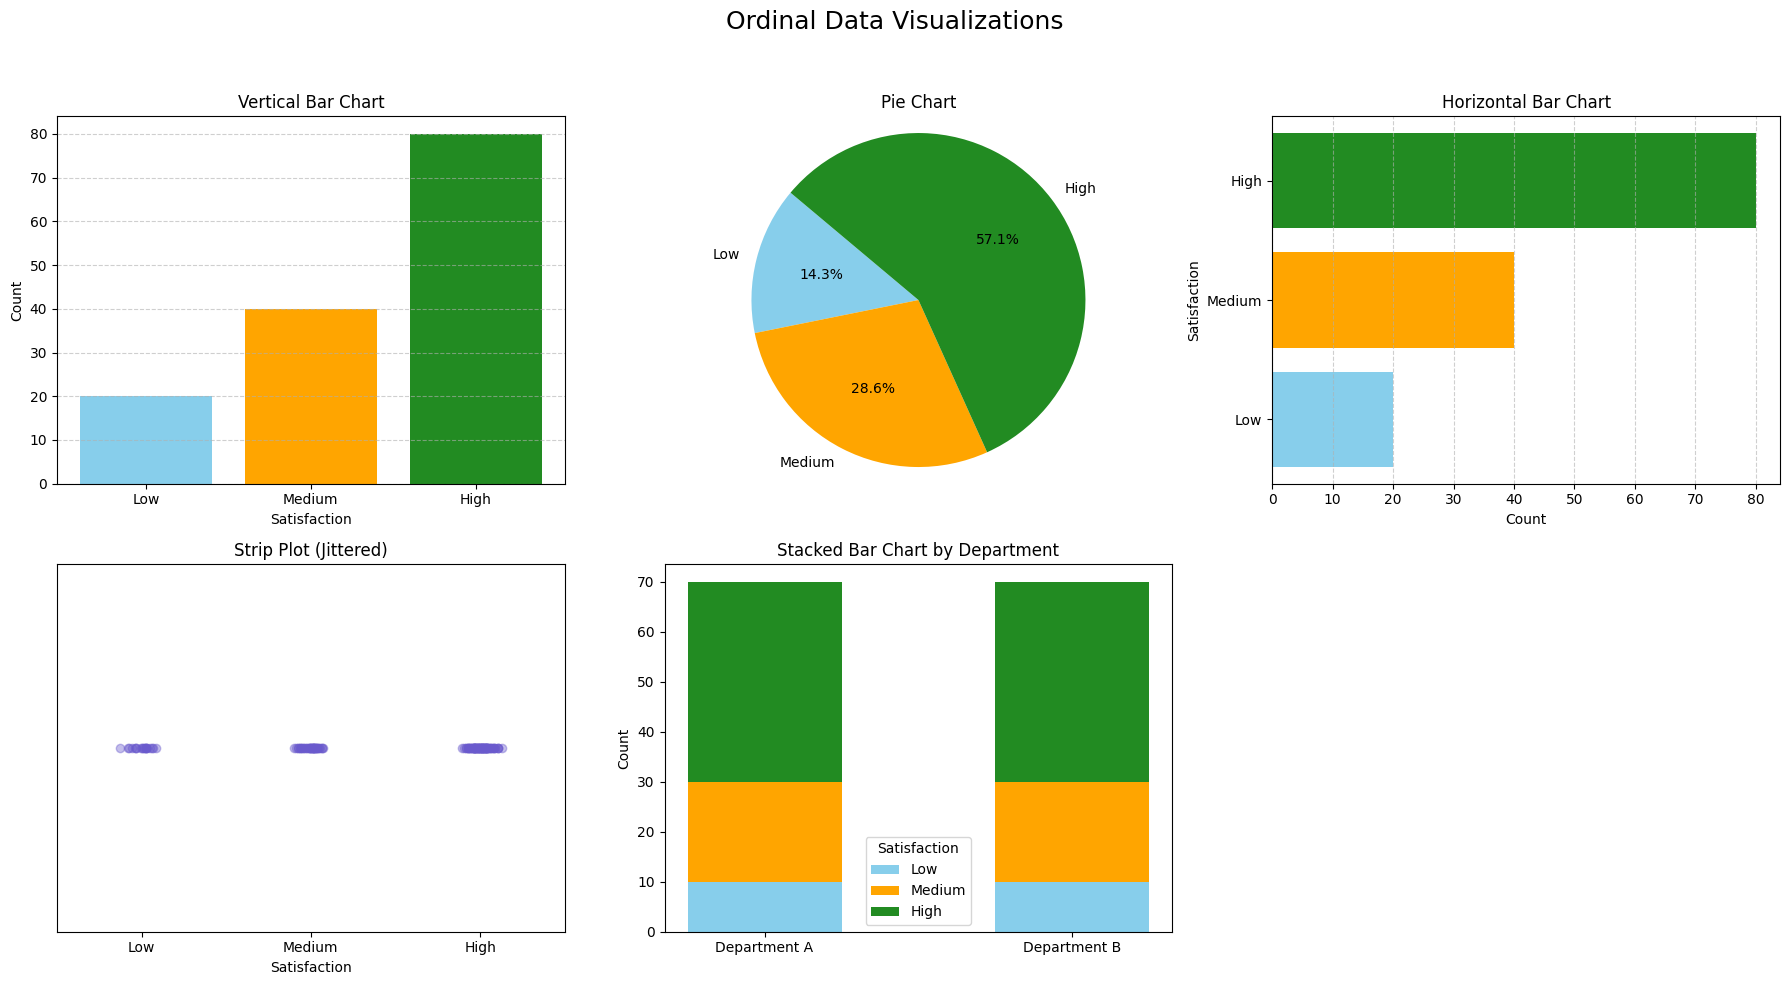

In [4]:
responses = ["Low"] * 20 + ["Medium"] * 40 + ["High"] * 80
ordered_levels = ["Low", "Medium", "High"]
responses_series = pd.Categorical(responses, categories=ordered_levels, ordered=True)

response_counts = Counter(responses_series)

print("response_counts", response_counts)

labels = ordered_levels
values = [response_counts[level] for level in labels]

strip_data = []
for level in ordered_levels:
    strip_data.extend([level] * response_counts[level])
strip_df = pd.DataFrame({"Satisfaction": strip_data})

dept_data = {
    "Department A": ["Low"] * 10 + ["Medium"] * 20 + ["High"] * 40,
    "Department B": ["Low"] * 10 + ["Medium"] * 20 + ["High"] * 40,
}
stacked_df = pd.DataFrame(dict([(k, pd.Categorical(v, categories=ordered_levels, ordered=True)) for k, v in dept_data.items()]))

stacked_counts = pd.DataFrame({dept: stacked_df[dept].value_counts().sort_index() for dept in stacked_df})

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Ordinal Data Visualizations", fontsize=18)

axes[0, 0].bar(labels, values, color=['skyblue', 'orange', 'forestgreen'])
axes[0, 0].set_title("Vertical Bar Chart")
axes[0, 0].set_xlabel("Satisfaction")
axes[0, 0].set_ylabel("Count")
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.6)


axes[0, 1].pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'forestgreen'])
axes[0, 1].set_title("Pie Chart")
axes[0, 1].axis('equal')


axes[0, 2].barh(labels, values, color=['skyblue', 'orange', 'forestgreen'])
axes[0, 2].set_title("Horizontal Bar Chart")
axes[0, 2].set_xlabel("Count")
axes[0, 2].set_ylabel("Satisfaction")
axes[0, 2].grid(axis='x', linestyle='--', alpha=0.6)


jitter = np.random.normal(0, 0.05, size=len(strip_df))
ordinal_mapping = {k: v for v, k in enumerate(ordered_levels)}
strip_df["x"] = [ordinal_mapping[val] + jitter[i] for i, val in enumerate(strip_df["Satisfaction"])]
strip_df["y"] = [1] * len(strip_df) 

axes[1, 0].plot(strip_df["x"], strip_df["y"], 'o', alpha=0.4, markersize=6, color='slateblue')
axes[1, 0].set_title("Strip Plot (Jittered)")
axes[1, 0].set_yticks([])
axes[1, 0].set_xticks(list(ordinal_mapping.values()))
axes[1, 0].set_xticklabels(ordered_levels)
axes[1, 0].set_xlabel("Satisfaction")
axes[1, 0].set_xlim(-0.5, 2.5)


bar_width = 0.5
x = np.arange(len(stacked_counts.columns))
bottom = np.zeros(len(x))

for idx, level in enumerate(ordered_levels):
    counts = stacked_counts.loc[level]
    axes[1, 1].bar(x, counts, bar_width, label=level, bottom=bottom, color=['skyblue', 'orange', 'forestgreen'][idx])
    bottom += counts

axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(stacked_counts.columns)
axes[1, 1].set_title("Stacked Bar Chart by Department")
axes[1, 1].set_ylabel("Count")
axes[1, 1].legend(title="Satisfaction")

# Hide the 6th subplot (unused)
axes[1, 2].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


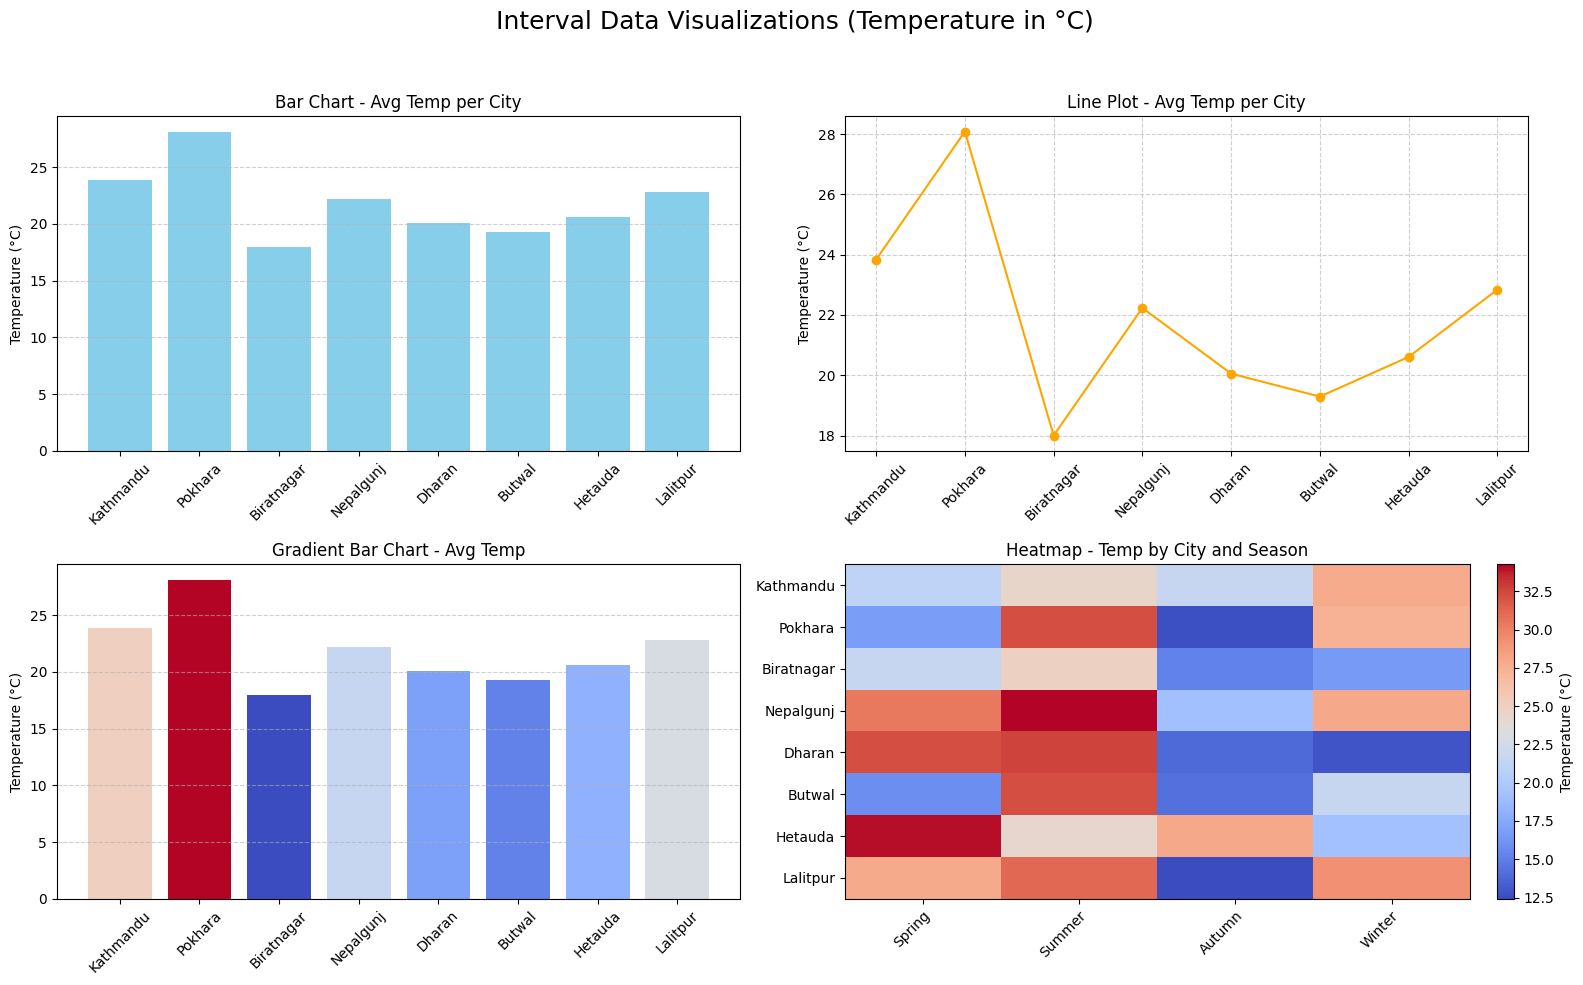

In [5]:
import matplotlib.pyplot as plt
import numpy as np

cities = ["Kathmandu", "Pokhara", "Biratnagar", "Nepalgunj", "Dharan", "Butwal", "Hetauda", "Lalitpur"]
seasons = ["Spring", "Summer", "Autumn", "Winter"]

np.random.seed(1)
city_temperatures = np.random.uniform(18, 32, size=len(cities))


temperature_matrix = np.random.uniform(12, 35, size=(len(cities), len(seasons)))

norm_values = (city_temperatures - min(city_temperatures)) / (max(city_temperatures) - min(city_temperatures))
gradient_colors = plt.cm.coolwarm(norm_values)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Interval Data Visualizations (Temperature in °C)", fontsize=18)


axes[0, 0].bar(cities, city_temperatures, color='skyblue')
axes[0, 0].set_title("Bar Chart - Avg Temp per City")
axes[0, 0].set_ylabel("Temperature (°C)")
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.6)


axes[0, 1].plot(cities, city_temperatures, marker='o', linestyle='-', color='orange')
axes[0, 1].set_title("Line Plot - Avg Temp per City")
axes[0, 1].set_ylabel("Temperature (°C)")
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, linestyle='--', alpha=0.6)

axes[1, 0].bar(cities, city_temperatures, color=gradient_colors)
axes[1, 0].set_title("Gradient Bar Chart - Avg Temp")
axes[1, 0].set_ylabel("Temperature (°C)")
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.6)


heatmap = axes[1, 1].imshow(temperature_matrix, cmap='coolwarm', aspect='auto')
axes[1, 1].set_xticks(np.arange(len(seasons)))
axes[1, 1].set_yticks(np.arange(len(cities)))
axes[1, 1].set_xticklabels(seasons)
axes[1, 1].set_yticklabels(cities)
plt.setp(axes[1, 1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
axes[1, 1].set_title("Heatmap - Temp by City and Season")


cbar = fig.colorbar(heatmap, ax=axes[1, 1], orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label("Temperature (°C)")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

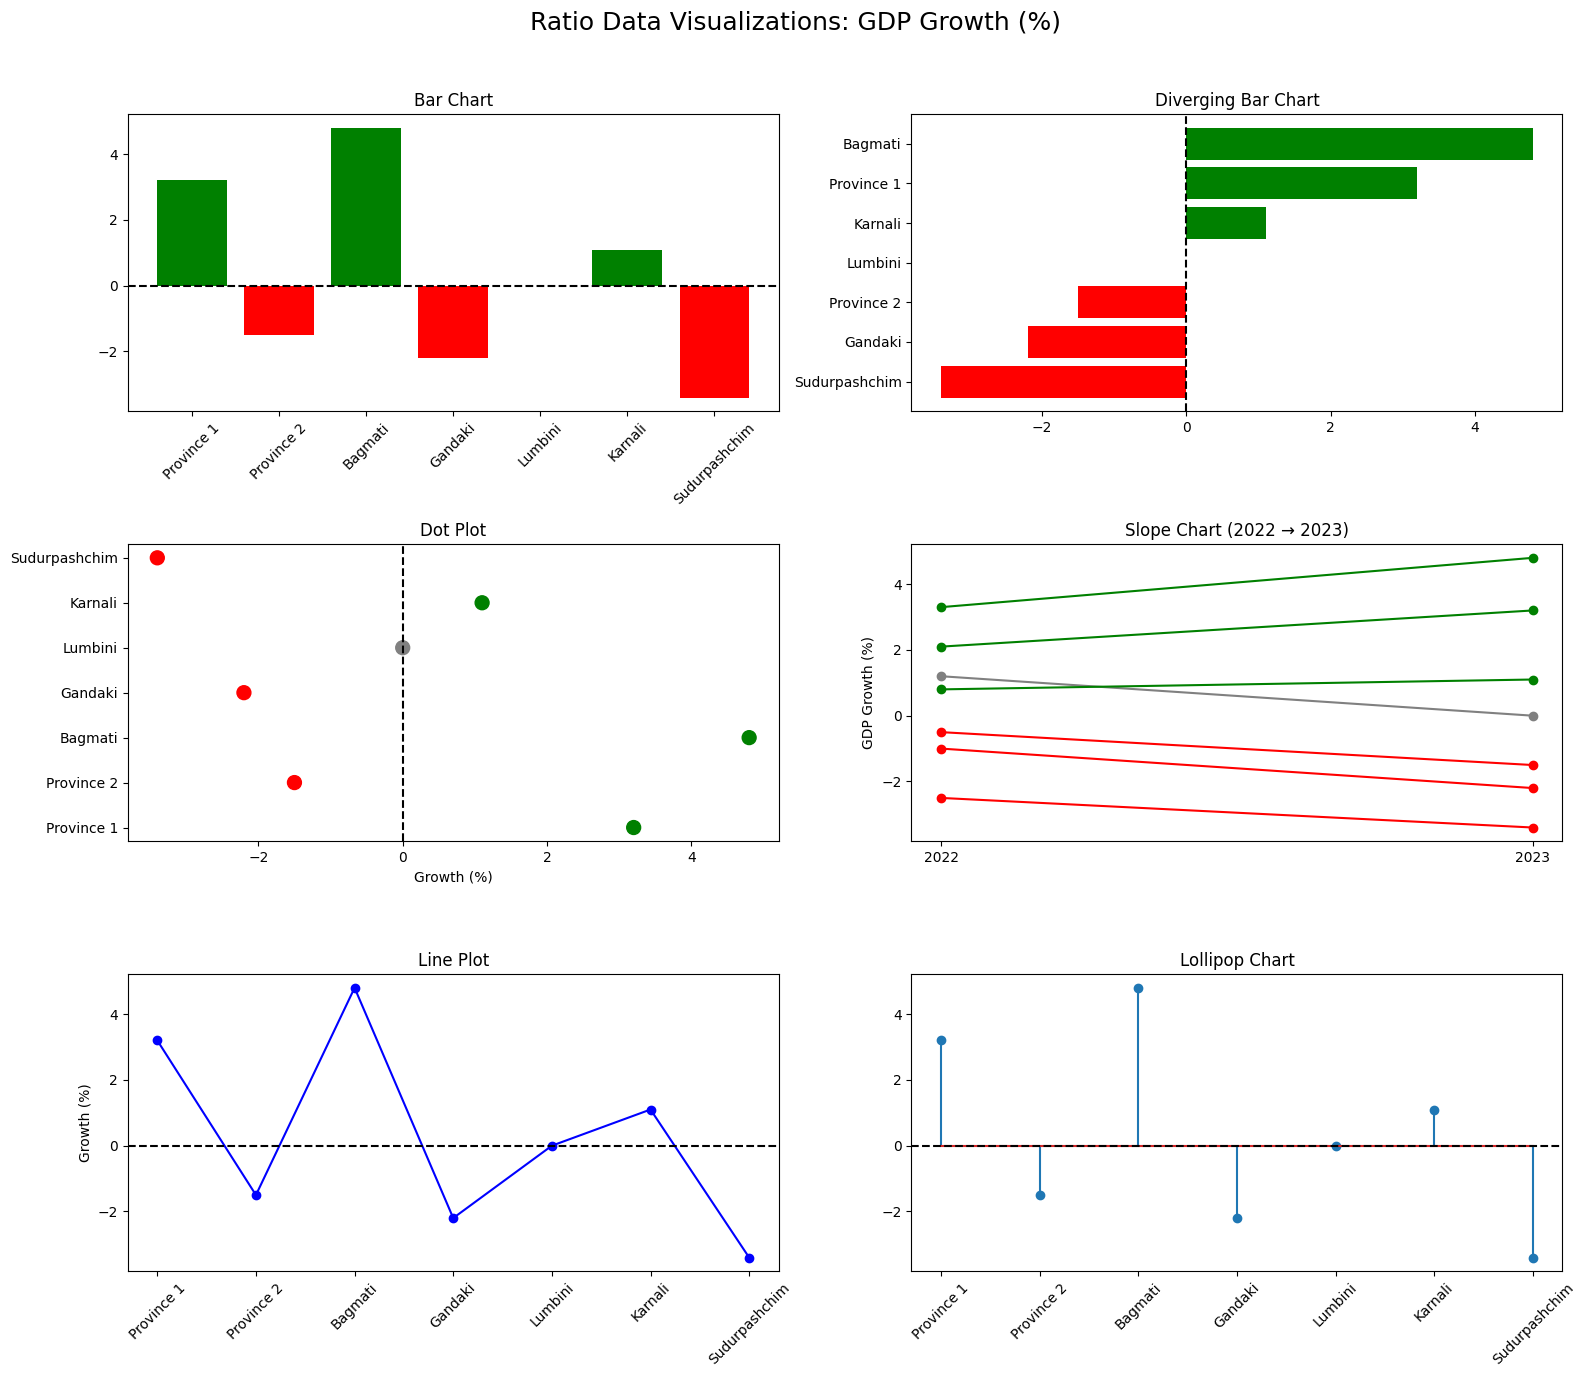

In [6]:
import matplotlib.pyplot as plt
import numpy as np


provinces = ["Province 1", "Province 2", "Bagmati", "Gandaki", "Lumbini", "Karnali", "Sudurpashchim"]
gdp_growth = [3.2, -1.5, 4.8, -2.2, 0.0, 1.1, -3.4]
colors = ['green' if val > 0 else 'red' if val < 0 else 'gray' for val in gdp_growth]
x_pos = np.arange(len(provinces))

gdp_2022 = [2.1, -0.5, 3.3, -1.0, 1.2, 0.8, -2.5]
gdp_2023 = gdp_growth


fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle("Ratio Data Visualizations: GDP Growth (%)", fontsize=18)


axes[0, 0].bar(provinces, gdp_growth, color=colors)
axes[0, 0].set_title("Bar Chart")
axes[0, 0].axhline(0, color='black', linestyle='--')
axes[0, 0].tick_params(axis='x', rotation=45)


sorted_data = sorted(zip(provinces, gdp_growth), key=lambda x: x[1])
sorted_provinces = [x[0] for x in sorted_data]
sorted_growth = [x[1] for x in sorted_data]
sorted_colors = ['green' if val > 0 else 'red' if val < 0 else 'gray' for val in sorted_growth]
axes[0, 1].barh(sorted_provinces, sorted_growth, color=sorted_colors)
axes[0, 1].axvline(0, color='black', linestyle='--')
axes[0, 1].set_title("Diverging Bar Chart")


axes[1, 0].scatter(gdp_growth, provinces, color=colors, s=100)
axes[1, 0].axvline(0, color='black', linestyle='--')
axes[1, 0].set_title("Dot Plot")
axes[1, 0].set_xlabel("Growth (%)")

for i in range(len(provinces)):
    axes[1, 1].plot([2022, 2023], [gdp_2022[i], gdp_2023[i]], marker='o', label=provinces[i], color=colors[i])
axes[1, 1].set_xticks([2022, 2023])
axes[1, 1].set_title("Slope Chart (2022 → 2023)")
axes[1, 1].set_ylabel("GDP Growth (%)")


axes[2, 0].plot(provinces, gdp_growth, marker='o', linestyle='-', color='blue')
axes[2, 0].axhline(0, color='black', linestyle='--')
axes[2, 0].set_title("Line Plot")
axes[2, 0].set_ylabel("Growth (%)")
axes[2, 0].tick_params(axis='x', rotation=45)


axes[2, 1].stem(x_pos, gdp_growth)
axes[2, 1].set_xticks(x_pos)
axes[2, 1].set_xticklabels(provinces, rotation=45)
axes[2, 1].axhline(0, color='black', linestyle='--')
axes[2, 1].set_title("Lollipop Chart")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
